#  Introduction

* #### Welcome to this workshop on Data Analysis/Visualization with Python!

* #### About Me:
    > * Jigar Patel (jbpatel4@illinois.edu)
    > * My Github (https://github.com/mickjigar)
* #### Why is this cool?
    
    > * Make data-analysis a breeze with powerful packages in Python
    
    > * Easily generate graphs for your research papers/lab reports
    
    > * Bottom Line: Say 'Good-bye' to spending hours with Excel to do your labs!

* #### Game Plan:
    >    0. Setup & Installation
    >    1. Import Packages
    >    2. Getting Data 
    >    3. Pre-processing Data
    >    4. General Summary
    >    5. Plots
    >    6. Analysis

# 0. Setup & Installation

* Install Anaconda (Python)
    
    > https://www.anaconda.com/download/


# 1. Import packages

* Pandas (Data Analysis Library)

    > https://pandas.pydata.org/pandas-docs/stable/10min.html
 
 
* Numpy (Scientific Computing)

    > http://www.numpy.org/
    
    
* Matplotlib (Plotting)

    > https://matplotlib.org/

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import glob
import os
import collections

# 2. Getting Data

* ### Download and Import Data 
    
    > * Example 1 : Analyzing Lab Experiment Data - CNC Force Analysis
    
    >   * Tool force at different Feeds and Speeds


In [428]:
directory = "C:/Users/jbpat/Documents/INFORMS/"
file1 = "Feed250Speed500clipped.xlsx"
file2 = "Feed250Speed1000clipped.xlsx"
file3 = "Feed500Speed500clipped.xlsx"
file4 = "Feed500Speed1000clipped.xlsx"

df1 = pd.read_excel("%s%s" % (directory,file1)).dropna() * 20
df2 = pd.read_excel("%s%s" % (directory,file2)).dropna() * 20
df3 = pd.read_excel("%s%s" % (directory,file3)).dropna() * 40
df4 = pd.read_excel("%s%s" % (directory,file4)).dropna() * 20

# 3. Pre-Processing Data 

* ### Explore and Clean Data

In [429]:
df1.head()
#df1.tail()
#df1.sample()

,Dev1/ai1,Dev1/ai2,Dev1/ai3
2,0.105,0.082,-0.59
3,0.505,-0.418,-0.41
4,-0.095,-0.318,-0.31
5,-0.095,0.182,0.87
6,0.005,-0.318,0.29


> #### Slicing Dataframe

In [260]:
#df.iloc

> #### Rename the columns

In [430]:
new_col_names = ['X','Y','Z']

df1.columns = new_col_names
df2.columns = new_col_names
df3.columns = new_col_names
df4.columns = new_col_names

df1.head()

,X,Y,Z
2,0.105,0.082,-0.59
3,0.505,-0.418,-0.41
4,-0.095,-0.318,-0.31
5,-0.095,0.182,0.87
6,0.005,-0.318,0.29


<div class="alert alert-block alert-info">

It is more efficient to automate when you have large number of files.

In [431]:
df_list = [df1, df2, df3, df4] #make a list of the DataFrames
feeds = [250, 250, 500, 500] #list of corresponding feed_rates
speeds = [500, 1000, 500, 1000] #list of corresponding speed_rates

for i in range(0, len(df_list)):
    df_list[i].columns = new_col_names

# 4. General Summary

* ### Extract descriptive statistics

In [432]:
#1. DataFrame.describe
df1.describe()

,X,Y,Z
count,24677.000000,24677.000000,24677.000000
mean,-6.829645,5.426668,15.734719
std,10.700659,65.088291,60.913005
min,-52.035000,-196.498000,-193.070000
25%,-12.595000,-1.198000,-0.790000
50%,-0.875000,0.262000,0.470000
75%,0.585000,8.962000,34.170000
max,17.885000,194.602000,189.450000


> #### For each test, compute average force for:
 * X, Y, Z directions
 * Resultant

In [433]:
avg_force = np.zeros((4,3)) 

for i in range(0,4): #iterate through 4 df's (rows)
    for j in range(0,3): #calculate avg_x,y,z (cols)
        
        avg_force[i][j] = (df_list[i].iloc[:,j].mean())

In [434]:
avg_force

array([[ -6.82964522,   5.42666831,  15.73471856],
       [ -2.99698369,   2.10518225,   9.80630918],
       [-13.42897331,  11.39871284,  29.2416021 ],
       [ -5.57522932,   4.35351378,  13.88047309]])

> #### Construct DataFrame from this info

In [435]:
df_avg_force = pd.DataFrame(data = avg_force, columns=['X', 'Y', 'Z']) #make the DF
df_avg_force

,X,Y,Z
0,-6.829645,5.426668,15.734719
1,-2.996984,2.105182,9.806309
2,-13.428973,11.398713,29.241602
3,-5.575229,4.353514,13.880473


In [436]:
#Add columns for Feed and Speed
df_avg_force.insert(0,'Feeds',feeds)
df_avg_force.insert(1,'Speeds',speeds)

#Compute Avg resultant force and insert as new Column
df_avg_force['Resultant'] = np.sqrt((df_avg_force['X'] ** 2) + (df_avg_force['Y'] ** 2) + (df_avg_force['Z'] ** 2))

df_avg_force

,Feeds,Speeds,X,Y,Z,Resultant
0,250,500,-6.829645,5.426668,15.734719,17.990946
1,250,1000,-2.996984,2.105182,9.806309,10.467923
2,500,500,-13.428973,11.398713,29.241602,34.137066
3,500,1000,-5.575229,4.353514,13.880473,15.578954


# 5. Plots

* ### Make plots for X, Y, Z force

> #### Let's walk through for Test 1, Force X & Force Y

In [512]:
fig = plt.figure(figsize=(50,20))

#X axis values (time)
xmax = df_list[0].count().values[0]
val_xaxis = np.arange(0, xmax)

#Y axis values (force)
val_yaxis1 = df_list[0].iloc[:,1]
val_yaxis2 = df_list[0].iloc[:,2]

#Plot data
plt.plot(val_xaxis,val_yaxis1, val_xaxis, val_yaxis2)

#Add axis and plot title
plt.ylabel('Force (N)',fontsize = 30)
plt.xticks(fontsize = 20)
plt.xlabel('Time (ms)',fontsize = 30)
plt.yticks(fontsize = 20)
plt.title("Test 1 Force Y, Z",fontsize = 30)

#Add legend
plt.legend(['Y','Z'],fontsize=30)
#plt.show() #comment when doing next step

> #### Extra Features: Annotations

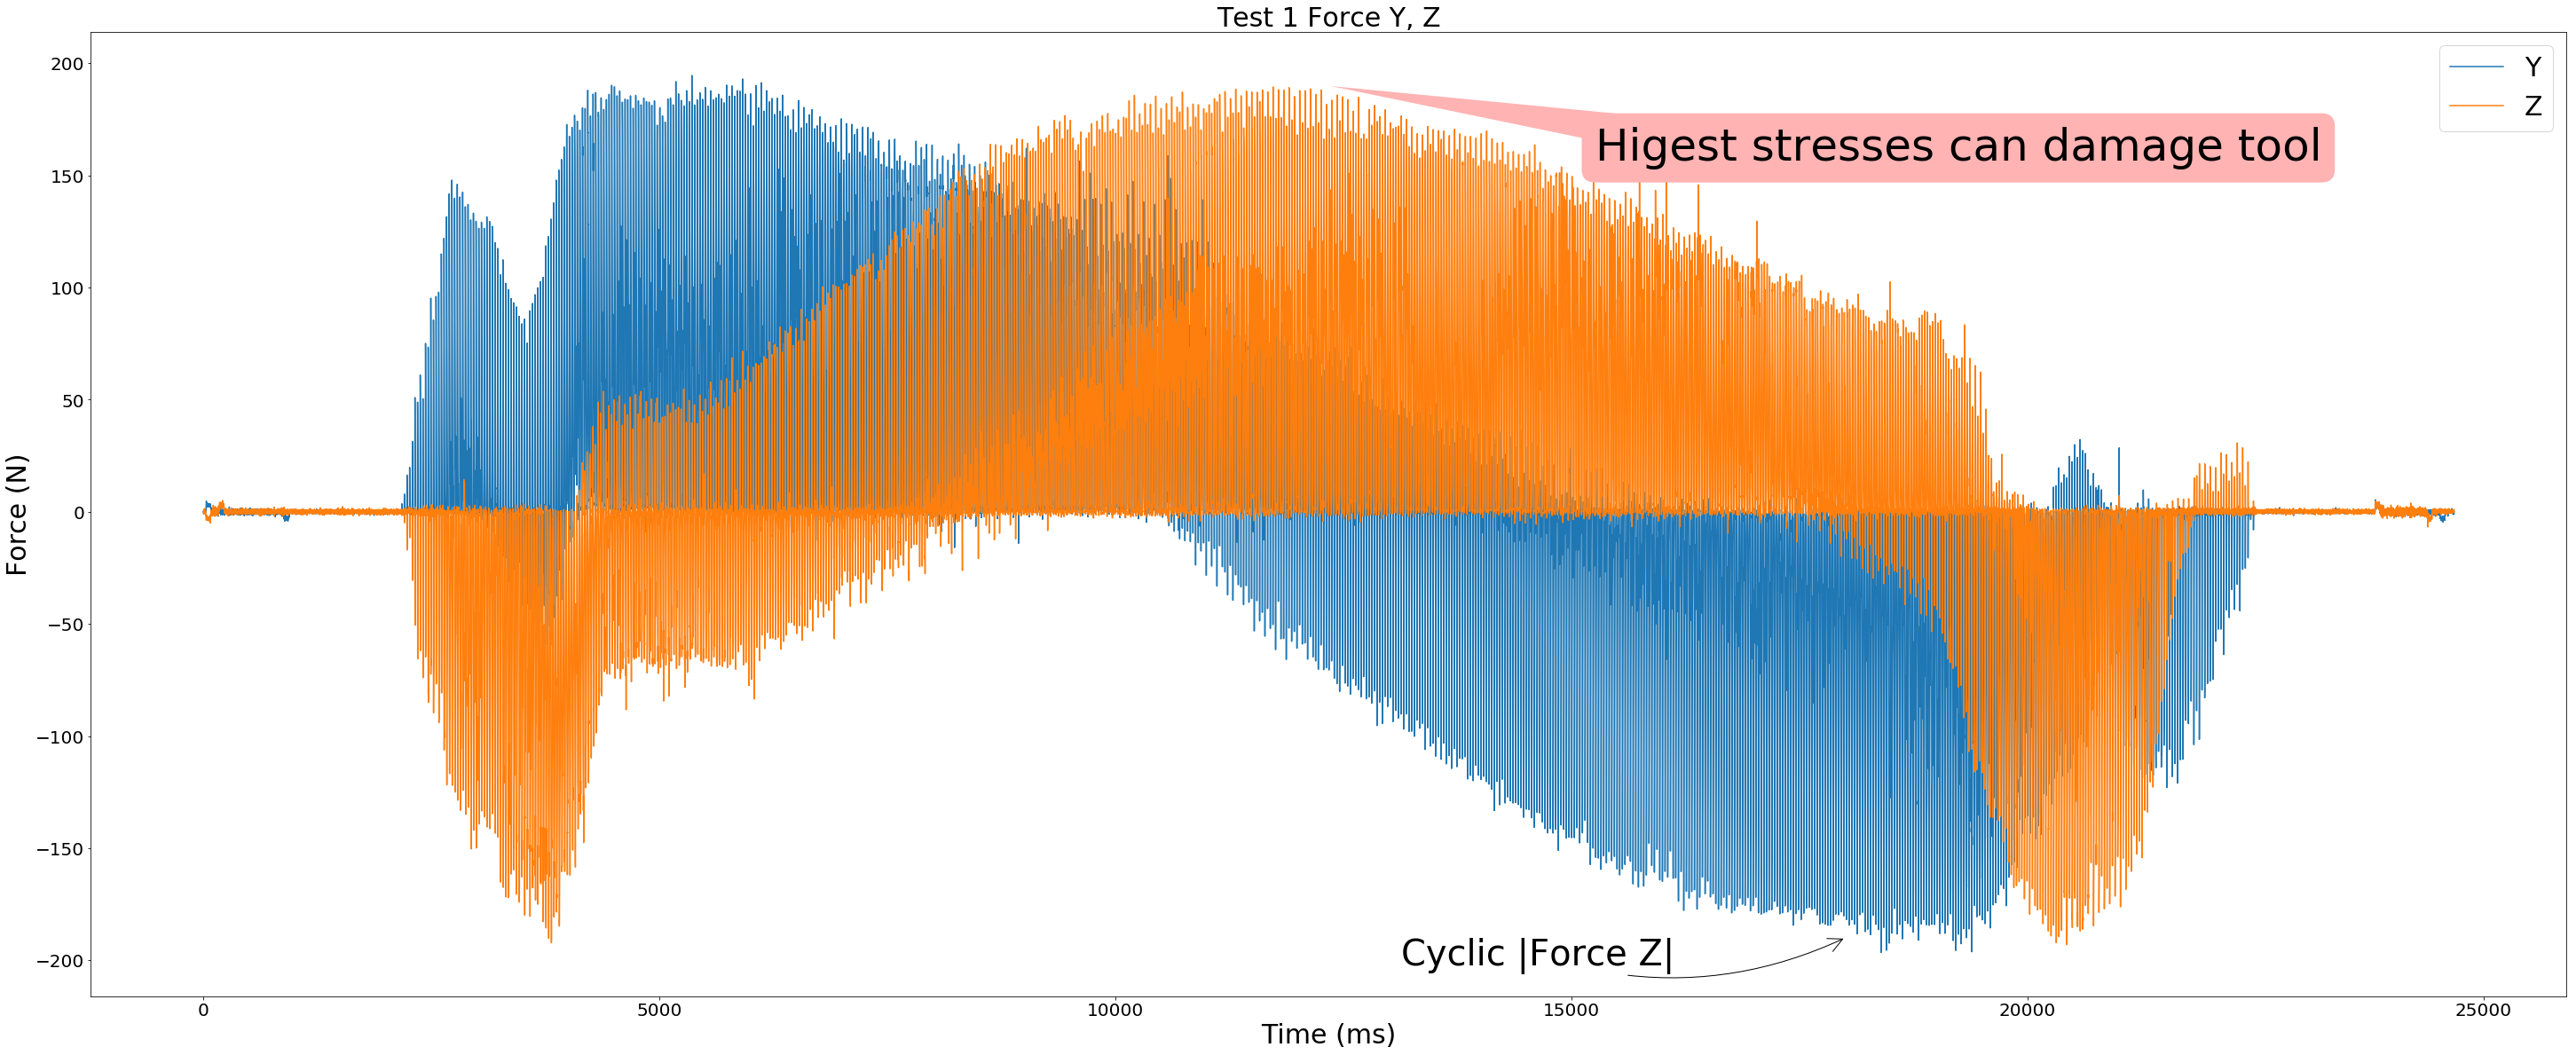

In [513]:
#Annotate
temp_avgx = df_avg_force['X'][0]

plt.annotate('Higest stresses can damage tool',
                  xy=(xmax/2, 190), xycoords='data',
                  xytext=(300,-70), textcoords='offset points',
                  size=50, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  relpos=(0.2, 0.5)))

plt.annotate(r'Cyclic |Force Z|',
             xy=(18000, -190), xycoords='data',
             xytext=(-500,-30), textcoords='offset points', fontsize=40,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", facecolor='black'))

#Save Figure
plt.gcf().savefig('Test1ForceYZ.png')
plt.show()

> #### Combine into a subplot

In [399]:
#Generate a 'fig' which contains many 'ax' in the form of subplots
#      -set figure size 

fig, ax = plt.subplots(3,1, figsize=(50,20))
fig.subplots_adjust()

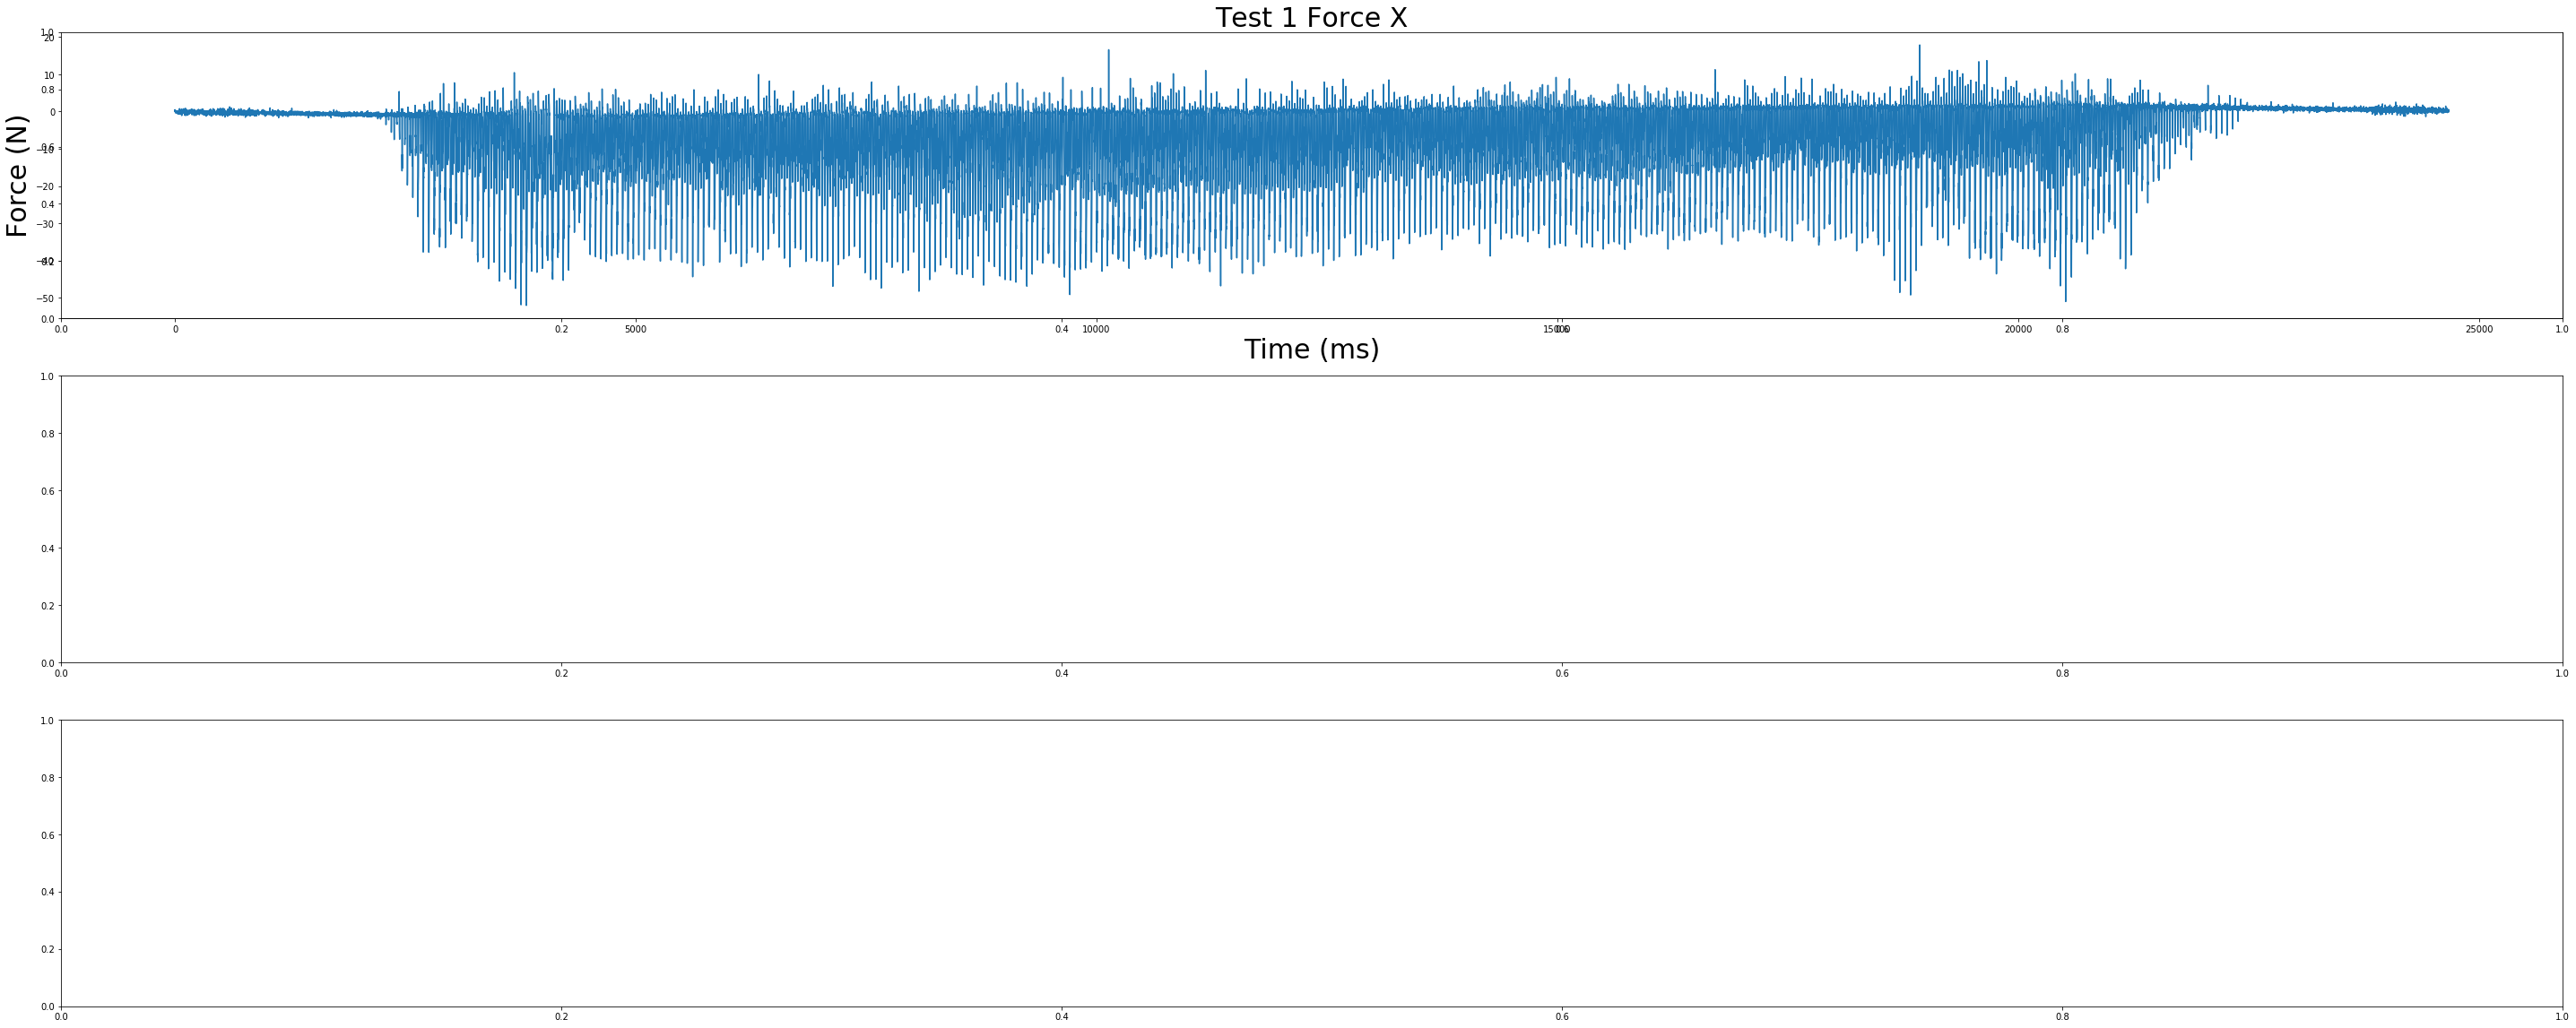

In [400]:
#X axis values (time)
xmax = df_list[0].count().values[0]
val_xaxis = np.arange(0, xmax)

#Y axis values (force)
val_yaxis = df_list[0].iloc[:,0]

#specify which 'ax' on the figure
#    - "311" = 3 x 1 grid, 1st subplot

fig.add_subplot(3,1,1)

#Plot data
plt.plot(val_xaxis,val_yaxis)

#Add axis and plot title
plt.ylabel('Force (N)',fontsize = 30)
plt.xticks(fontsize = 10)
plt.xlabel('Time (ms)',fontsize = 30)
plt.yticks(fontsize = 10)
plt.title("Test 1 Force X",fontsize = 30)

plt.show()

<div class="alert alert-block alert-info">

It is more efficient to automate when you have large number of files.

In [401]:
df_list = [df1, df2, df3, df4]
df_string = ['F250S500', 'F250S1000', 'F500S500', 'F500S1000']

for i in range(0,4):
    
    fig, axes = plt.subplots(3,1, figsize=(50,20))
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.91, hspace=0.4)

    plt.suptitle(f"{df_string[i]}_Force in X,Y,Z", fontsize = 40)

    for idx, row in enumerate(axes):
        X = np.arange(0, df_list[i].count().values[0])
        Y = df_list[i][df_list[i].columns[idx]].values
        fig.add_subplot(3,1,idx+1) #appending to the subplots
        plt.plot(X,Y)
        plt.ylabel('Force (N)',fontsize = 30)
        plt.xticks(fontsize = 10)
        plt.xlabel('Time (ms)',fontsize = 30)
        plt.yticks(fontsize = 10)
        plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.1e'))
        plt.title(f"Force_{df_list[i].columns.values[idx]}",fontsize = 30)
        plt.gcf().savefig('{}.png'.format(df_string[i]))
    
    plt.clf()

# 6. Analysis

* ### Use plots to understand relationship between Feeds, Speeds, and Resultant Force

In [516]:
df_avg_force

,Feeds,Speeds,X,Y,Z,Resultant
0,250,500,-6.829645,5.426668,15.734719,17.990946
1,250,1000,-2.996984,2.105182,9.806309,10.467923
2,500,500,-13.428973,11.398713,29.241602,34.137066
3,500,1000,-5.575229,4.353514,13.880473,15.578954


In [529]:
ary6 = np.zeros((2,2))
ary6[0,0] = 17.990946
ary6[0,1] = 10.467923
ary6[1,0] = 34.137066
ary6[1,1] = 15.578954

df_ary6 = pd.DataFrame(data = ary6, index=['250', '500'],columns=['500', '1000']) #make the DF
df_ary6


,500,1000
250,17.990946,10.467923
500,34.137066,15.578954


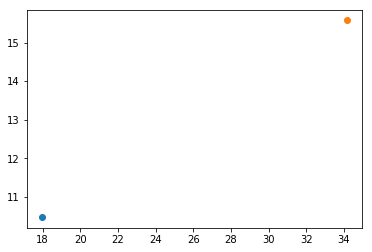

In [532]:
plt.figure()
plt.scatter(ary6[0,0], ary6[0,1])
plt.scatter(ary6[1,0], ary6[1,1])
plt.show()